In [3]:
import yt
import pythreejs
from pythreejs import *
import numpy as np
from IPython.display import display
from ipywidgets import HTML, Text
from traitlets import link, dlink

In [4]:
# Print working version of pythreejs
pythreejs.__version__

'0.3.0'

In [5]:
# Loading data
ds = yt.load("IsolatedGalaxy/galaxy0030/galaxy0030")

yt : [INFO     ] 2017-06-30 19:57:03,965 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2017-06-30 19:57:03,968 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2017-06-30 19:57:03,971 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-06-30 19:57:03,974 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2017-06-30 19:57:03,976 Parameters: cosmological_simulation   = 0.0


In [4]:
# Viewing grid objects
# Grid objects are organized by size: largest -> increasingly refined -> smallest
ds.index.grids

Parsing Hierarchy : 100%|██████████| 173/173 [00:00<00:00, 19974.53it/s]
yt : [INFO     ] 2017-06-30 19:47:32,802 Gathering a field list (this may take a moment.)


array([EnzoGrid_0001, EnzoGrid_0002, EnzoGrid_0003, EnzoGrid_0004,
       EnzoGrid_0005, EnzoGrid_0006, EnzoGrid_0007, EnzoGrid_0008,
       EnzoGrid_0009, EnzoGrid_0010, EnzoGrid_0011, EnzoGrid_0012,
       EnzoGrid_0013, EnzoGrid_0014, EnzoGrid_0015, EnzoGrid_0016,
       EnzoGrid_0017, EnzoGrid_0018, EnzoGrid_0019, EnzoGrid_0020,
       EnzoGrid_0021, EnzoGrid_0022, EnzoGrid_0023, EnzoGrid_0024,
       EnzoGrid_0025, EnzoGrid_0026, EnzoGrid_0027, EnzoGrid_0028,
       EnzoGrid_0029, EnzoGrid_0030, EnzoGrid_0031, EnzoGrid_0032,
       EnzoGrid_0033, EnzoGrid_0034, EnzoGrid_0035, EnzoGrid_0036,
       EnzoGrid_0037, EnzoGrid_0038, EnzoGrid_0039, EnzoGrid_0040,
       EnzoGrid_0041, EnzoGrid_0042, EnzoGrid_0043, EnzoGrid_0044,
       EnzoGrid_0045, EnzoGrid_0046, EnzoGrid_0047, EnzoGrid_0048,
       EnzoGrid_0049, EnzoGrid_0050, EnzoGrid_0051, EnzoGrid_0052,
       EnzoGrid_0053, EnzoGrid_0054, EnzoGrid_0055, EnzoGrid_0056,
       EnzoGrid_0057, EnzoGrid_0058, EnzoGrid_0059, EnzoGrid_0

In [5]:
Left_Edges = []

for grid in ds.index.grids:
    Left_Edges.append(grid.LeftEdge)

In [6]:
box_size = BoxGeometry(height=0.5, width=0.5, depth=0.5)
material = LambertMaterial(color='green')

dl = DirectionalLight(color='#ccaabb', position=[0, 1, 5], intensity=2)
al = AmbientLight(color='#cccccc')

cam = PerspectiveCamera(position=[2, 2, 2], up=[1, 1, 1], children=[dl])
   
mesh = []

for edge in Left_Edges:
    for e in edge:
        mesh = Mesh(geometry=box_size, material=material, position=[edge[0], edge[1], edge[2]])
        print(mesh)

s = Scene(children=[mesh])
renderer = Renderer(camera=cam, background='black', background_opacity=1,
                    scene=s, controls=[OrbitControls(controlling=cam)])
display(renderer)

Parsing Hierarchy : 100%|██████████| 173/173 [00:00<00:00, 2648.98it/s]
yt : [INFO     ] 2017-06-30 19:57:19,739 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2017-06-30 19:57:21,630 Projection completed
yt : [INFO     ] 2017-06-30 19:57:21,639 xlim = 0.000000 1.000000
yt : [INFO     ] 2017-06-30 19:57:21,641 ylim = 0.000000 1.000000
yt : [INFO     ] 2017-06-30 19:57:21,647 xlim = 0.000000 1.000000
yt : [INFO     ] 2017-06-30 19:57:21,649 ylim = 0.000000 1.000000
yt : [INFO     ] 2017-06-30 19:57:21,662 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



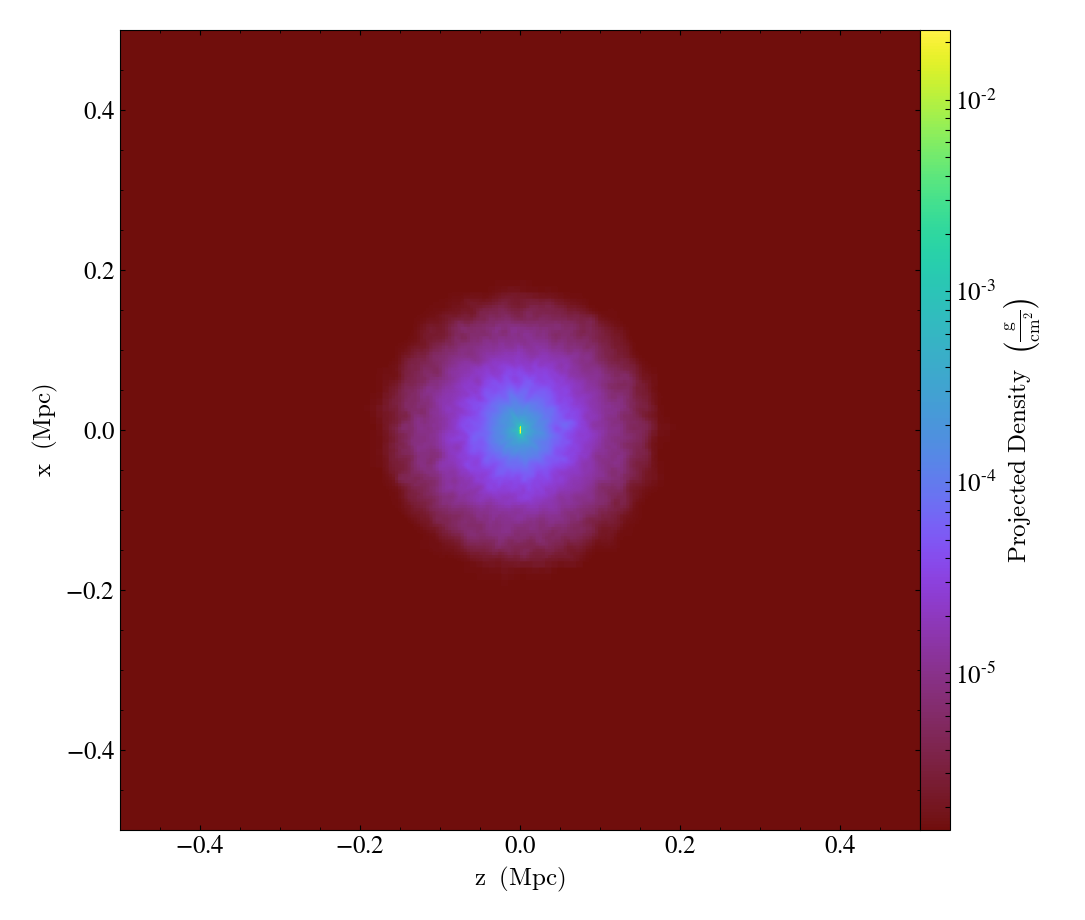

In [6]:
p = yt.ProjectionPlot(ds, "y", "density")
p.show()

yt : [INFO     ] 2017-06-30 19:57:34,895 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



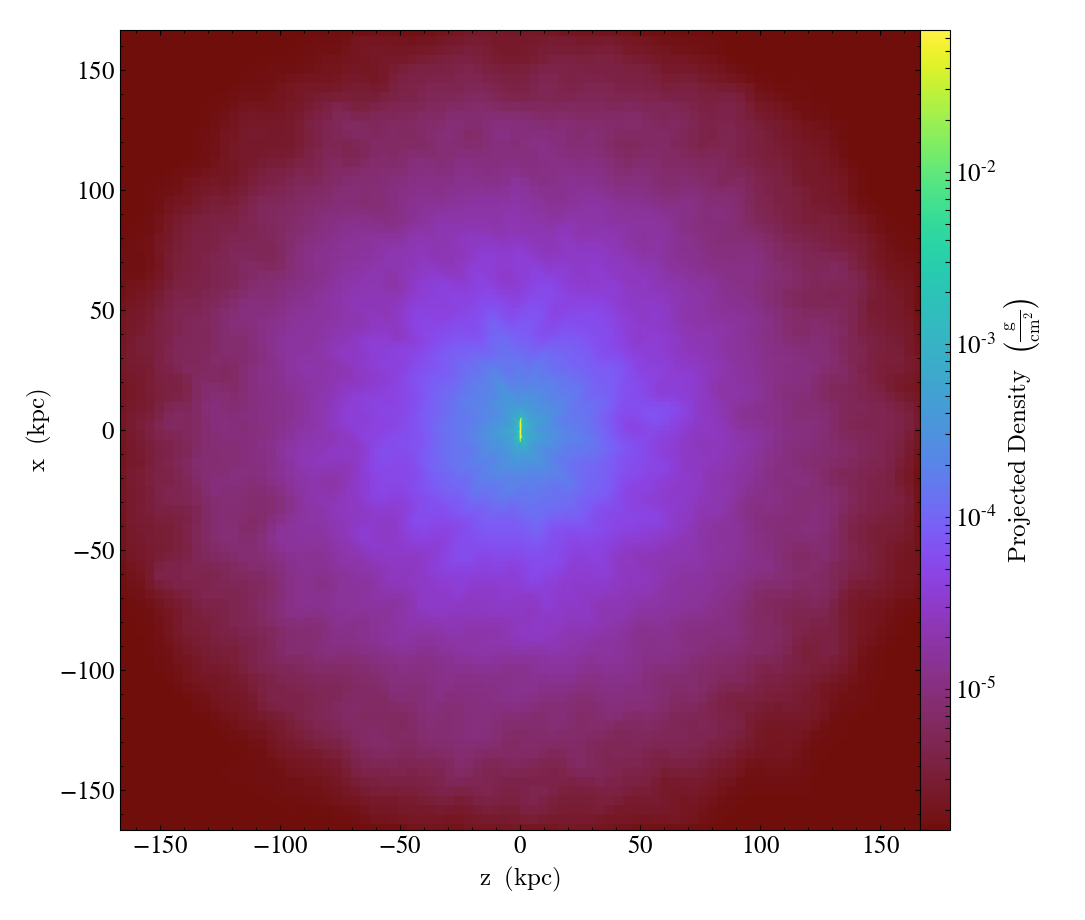

In [7]:
p.zoom(3.0)

yt : [INFO     ] 2017-06-30 19:57:42,967 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



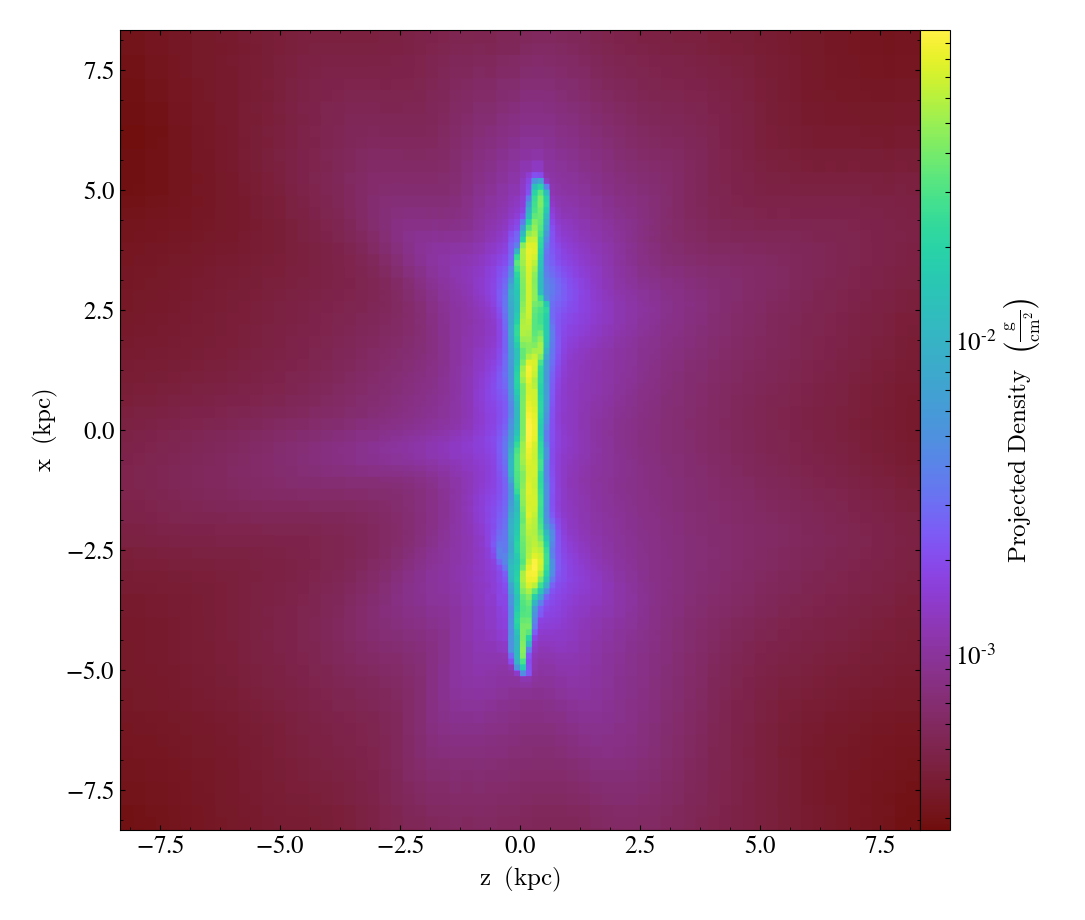

In [8]:
p.zoom(20)